# IRIS FLOWER CLASSIFICATION

## INTRODUCTION

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 150 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [48]:
# Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

To build a model in order to predict fraudulent transactions, we can follow these steps:

1.Data Preprocessing: Handle missing values, scale features, etc.

2.Exploratory Data Analysis (EDA): Understand data distributions, relationships, and imbalances.

3.Model Selection and Training: Choose and train machine learning models.

4.Model Evaluation: Evaluate model performance using appropriate metrics.


In [49]:
ir = pd.read_csv(r"S:\CODSOFT\IRIS.csv")

# 1. Data Preprocessing

In [50]:
ir.shape

(150, 5)

In [51]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [52]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
ir.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [54]:
ir.isnull().sum()[ir.isnull().sum()>0]

Series([], dtype: int64)

* No nulls values are present.

In [55]:
ir.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [56]:
ir.select_dtypes(include = "object").columns

Index(['species'], dtype='object')

In [57]:
ir.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [58]:
ir.species.replace({'Iris-setosa' : 0 , 'Iris-versicolor' : 1 , 'Iris-virginica' : 2} , inplace = True)

In [59]:
ir.select_dtypes(include = "object").columns

Index([], dtype='object')

# 2. EDA

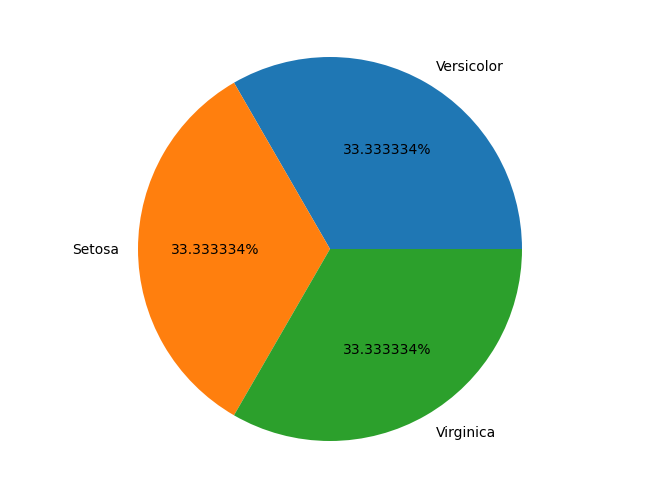

In [60]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l, autopct='%1f%%')
plt.show()


This pie chart is created to visually represent the distribution of data among three classes: 

Versicolor, Setosa, and Virginica. Each class is represented by a segment of the pie, and the size of each segment corresponds to the proportion of data points belonging to that class in the dataset.

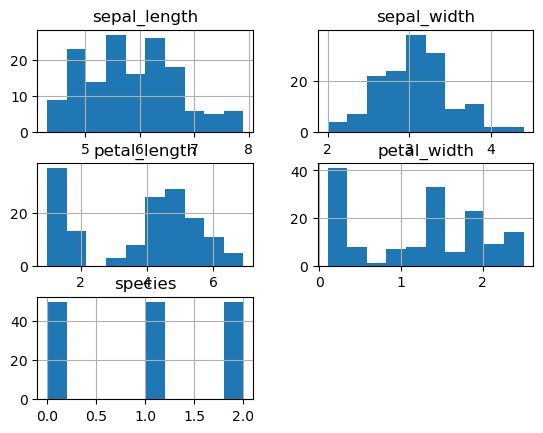

In [61]:
ir.hist()
plt.show()

 Here is a histogram for each numerical column in this iris DataFrame. 
 Each histogram represents a distribution of values for each particular feature 
 (e.g., sepal length, sepal width, petal length, petal width) in the Iris dataset. 

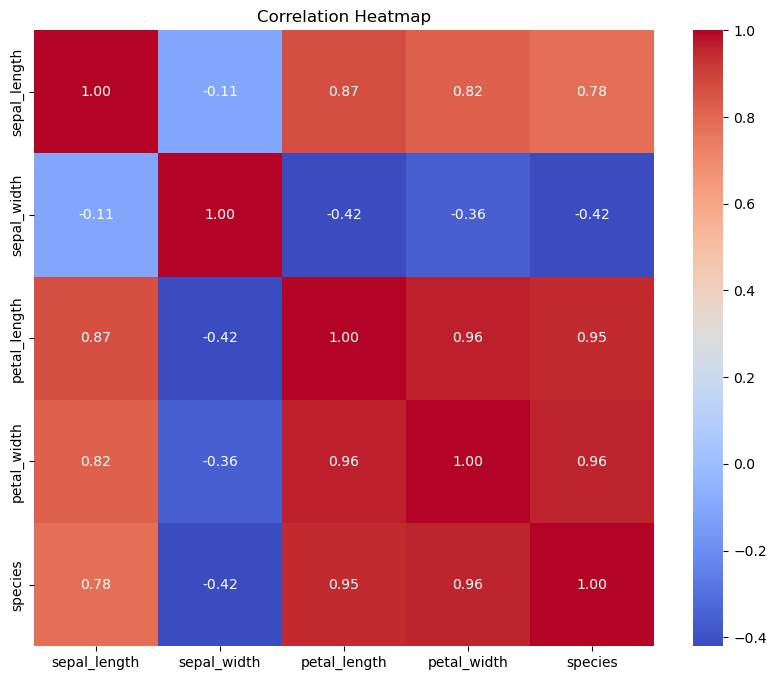

In [62]:
plt.figure(figsize=(10, 8))  
sns.heatmap(ir.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Model Selection and training

In [63]:
from sklearn.model_selection import train_test_split

ir_train , ir_test = train_test_split(ir , test_size = .2)

ir_train_x = ir_train.drop(["species"] , axis = 1)
ir_train_y = ir_train.species

ir_test_x = ir_test.drop(["species"] , axis = 1)
ir_test_y = ir_test.species

### LOGISTIC REGRESSION

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ir_train_x , ir_train_y)

LogisticRegression()

In [65]:
pred_test = logreg.predict(ir_test_x)
pred_test

array([2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2,
       1, 0, 1, 1, 0, 2, 1, 0], dtype=int64)

In [66]:
pred_train = logreg.predict(ir_train_x)
pred_train

array([1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1, 0, 1, 2,
       2, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 2, 1, 0, 0, 1, 2, 1, 0], dtype=int64)

In [67]:
from sklearn.metrics import *

In [68]:
tab = confusion_matrix(ir_test_y , pred_test)
tab

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  9]], dtype=int64)

In [69]:
tab_ir = pd.DataFrame(tab)
tab_ir.columns = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir.index = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,1,9


In [70]:
print(classification_report(ir_test_y , pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.93         7
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### DECISION TREE

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ir_train_x, ir_train_y)

DecisionTreeClassifier()

In [73]:
pred_dt = dt.predict(ir_test_x)

In [75]:
tab = confusion_matrix(ir_test_y , pred_dt)
tab

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  9]], dtype=int64)

In [76]:
tab_ir = pd.DataFrame(tab)
tab_ir.columns = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir.index = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,1,9


In [77]:
print(classification_report(ir_test_y, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.93         7
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### RANDOM FOREST

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(ir_train_x, ir_train_y)

RandomForestClassifier()

In [79]:
pred_rfc = rfc.predict(ir_test_x)

In [80]:
tab = confusion_matrix(ir_test_y, pred_rfc)
tab

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  8]], dtype=int64)

In [81]:
tab_ir = pd.DataFrame(tab)
tab_ir.columns = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir.index = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,2,8


In [83]:
print(classification_report(ir_test_y, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88         7
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



### SUPPORT VECTOR MACHINE(SVM)

In [85]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(ir_train_x , ir_train_y)

SVC()

In [86]:
pred_svc = svc.predict(ir_test_x)

In [88]:
tab = confusion_matrix(ir_test_y, pred_svc)
tab

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  2,  8]], dtype=int64)

In [89]:
tab_ir = pd.DataFrame(tab)
tab_ir.columns = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir.index = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,2,8


In [90]:
print(classification_report(ir_test_y, pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.78      1.00      0.88         7
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



### KNN - K NEAREST NEIGHBOUR

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(ir_train_x, ir_train_y)

KNeighborsClassifier()

In [92]:
pred_knn = knn.predict(ir_test_x)

In [93]:
tab = confusion_matrix(ir_test_y, pred_knn)
tab

array([[13,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  9]], dtype=int64)

In [94]:
tab_ir = pd.DataFrame(tab)
tab_ir.columns = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir.index = ["Iris-setosa" , "Iris-versicolor" , "Iris-virginica"]
tab_ir

,Iris-setosa,Iris-versicolor,Iris-virginica
Iris-setosa,13,0,0
Iris-versicolor,0,7,0
Iris-virginica,0,1,9


In [95]:
print(classification_report(ir_test_y, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.93         7
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# 4. Model Evaluation

Here , out of all models KNN model is showing a very good accuracy.

**Precision:** The ratio of correctly predicted positive observations to the total predicted positives. It measures the accuracy of positive predictions. here in KNN model, precision for each class is 0.97, means 97% positive predictions for each class are correct.

**Recall:** The ratio of correctly predicted positive observations to the all observations in actual class. It measures the ability of the model to capture all the positive instances. in KNN model, each class has a recall of >0.90, indicating that the model 9correctly identified all instances of each class.

**F1-score:** The weighted average of Precision and Recall. It considers both false positives and false negatives. It is a good way to show that a classifer has a good value for both recall and precision. As with precision and recall, the F1-score for each class is >0.90.

**Accuracy:** The proportion of correctly classified observations among the total observations. In this case, the overall accuracy is also 0.97, indicating perfect performance.

In summary, the KNN model seems to be performing exceptionally well, with perfect precision, recall, and F1-score for each class, and an overall accuracy of 0.97 Which means that the KNN model is accurately classifying the observations in this dataset.

Hence, I will use KNN algorithms to train my model.